In [11]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import pickle

In [12]:
txt_file = 'RelabDatabase2020Dec31/data/jeh/pq/capq03.txt'
df = pd.read_table(txt_file, sep='\t', skiprows=2, names = ['wavelength', 'reflectance'])


# Material files used for testing
"""

txt_file = 'RelabDatabase2020Dec31/data/asr/sr/bkr1sr030.txt' starts from 300, step 5

txt_file = 'RelabDatabase2020Dec31/data/awb/mt/bkr1mt168a.txt' starts from 280, step 5

txt_file = 'RelabDatabase2020Dec31/data/jeh/pq/capq03.txt' starts from 300 ends at 2500, step 5

"""


# # Group by wavelength to use wavelength as index
# gbw = df.groupby('wavelength').mean()
# gbw.head()

"\n\ntxt_file = 'RelabDatabase2020Dec31/data/asr/sr/bkr1sr030.txt' starts from 300, step 5\n\ntxt_file = 'RelabDatabase2020Dec31/data/awb/mt/bkr1mt168a.txt' starts from 280, step 5\n\ntxt_file = 'RelabDatabase2020Dec31/data/jeh/pq/capq03.txt' starts from 300 ends at 2500, step 5\n\n"

In [13]:
def resample(df, n=5):
    df2 = df.groupby(df.index // n).mean()
    df2.index *=n
    return df2

In [14]:
# Preprocess wavelength data
# Resampling the wavelength into steps of n
# Investigate weird errors
def preprocess_material_response(df, n = 5, start = 300, limit = 3000, start_threshold = 50, end_threshold = 500, ignore_limits = False):
    # Assuming the format is df" [wavelength, reflectance]
    
    # We first convert the wavelength from micron to nanometer
    df['wavelength'] = df['wavelength'].apply(lambda x: int(x * 1000))
        
    # Group by wavelength to use wavelength as index
    df = df.groupby('wavelength').mean()
        
    # Here we make sure that the steps of the wevelength are of step n
    df2 = resample(df,n)
    
    # To reduce runtime, we can limit the range we are evaluating to
    # This limit should be set so it is the same as the limit of the camera response function
    # We want to make sure that the start and end is within the boundaries that we set
        
    ori_fvi = df2.first_valid_index()
    ori_lvi = df2.last_valid_index()
    
    df2 = df2.loc[df2.index >= start]
    df2 = df2.loc[df2.index <= limit]
    
    if ignore_limits == False:
        fvi = df2.first_valid_index()
        lvi = df2.last_valid_index()
        
        if fvi is None or lvi is None:
            raise ValueError(f'The start ({start}) and limit ({limit}) values yielded an empty dataframe. The material wavelength started at {ori_fvi} and ends at {ori_lvi}')

        if abs(fvi - start) > start_threshold:
            raise ValueError(f'The material wavelength starts at {fvi} while our starting value is {start} with a threshold of {start_threshold}')

        if abs(lvi - limit) > end_threshold:
            raise ValueError(f'The material wavelength ends at {lvi} while our ending value is {limit} with a threshold of {end_threshold}')

    return df2

df = pd.read_table(txt_file, sep='\t', skiprows=2, names = ['wavelength', 'reflectance'])
material_df = preprocess_material_response(df)

In [5]:
plt.figure(figsize=(10,5))
plt.title('Material Reflectance')
plt.plot(material_df.index, material_df['reflectance'])
plt.xlabel('Wavelength (Micron)')
plt.ylabel('Reflectance')
plt.show()

NameError: name 'plt' is not defined

In [15]:
resp_file = 's2a_response.csv'
sr_df = pd.read_csv(resp_file, skiprows=1)

# Group by wavelength so we can use it as index
sr_df = sr_df.groupby('SR_WL').mean()

print(sr_df.shape)
sr_df.head() # Step is 1

(2301, 13)


,S2A_SR_AV_B1,S2A_SR_AV_B2,S2A_SR_AV_B3,S2A_SR_AV_B4,S2A_SR_AV_B5,S2A_SR_AV_B6,S2A_SR_AV_B7,S2A_SR_AV_B8,S2A_SR_AV_B8A,S2A_SR_AV_B9,S2A_SR_AV_B10,S2A_SR_AV_B11,S2A_SR_AV_B12
SR_WL,,,,,,,,,,,,,
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Resampling the wavelength into steps of n
n = 5

camera_df = resample(sr_df,n)
camera_df.to_pickle("camera_df.pkl")

In [18]:
camera_df.head() # Now step is 5

,S2A_SR_AV_B1,S2A_SR_AV_B2,S2A_SR_AV_B3,S2A_SR_AV_B4,S2A_SR_AV_B5,S2A_SR_AV_B6,S2A_SR_AV_B7,S2A_SR_AV_B8,S2A_SR_AV_B8A,S2A_SR_AV_B9,S2A_SR_AV_B10,S2A_SR_AV_B11,S2A_SR_AV_B12
SR_WL,,,,,,,,,,,,,
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


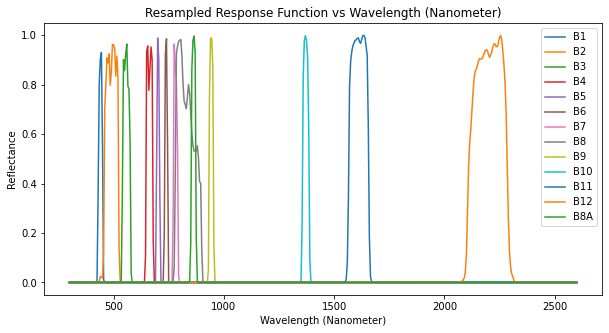

In [130]:
# Plotting our camera response function

plt.figure(figsize=(10,5))
plt.title('Resampled Response Function vs Wavelength (Nanometer)')

plt.plot(df1.index, camera_df['S2A_SR_AV_B1'], label='B1')

for i in range(2,13):
    plt.plot(camera_df[f'S2A_SR_AV_B{i}'], label=f'B{i}')

plt.plot(camera_df['S2A_SR_AV_B8A'], label = 'B8A')

plt.legend(loc="upper right")
plt.xlabel('Wavelength (Nanometer)')
plt.ylabel('Reflectance')
plt.show()

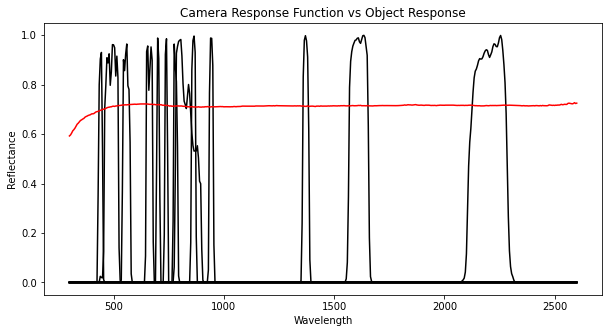

In [131]:
# Plotting our material reflectance and the camera response function

plt.figure(figsize=(10,5))
plt.title('Camera Response Function vs Object Response')

plt.plot(camera_df.index, camera_df['S2A_SR_AV_B1'], label='B1',color='black')

for i in range(2,13):
    plt.plot(camera_df[f'S2A_SR_AV_B{i}'], label=f'B{i}', color='black')

plt.plot(camera_df['S2A_SR_AV_B8A'], label = 'B8A', color='black')

plt.xlabel('Wavelength')
plt.ylabel('Reflectance')

# Group by wavelength and take the mean
plt.plot(material_df['reflectance'].loc[material_df.index <= 3000], color='red')
plt.show()

In [21]:
def get_weighted_sum(material_df,camera_df,band_name):
    
    weight_sum = 0
    missing_idx = set()

    for wv, row in material_df.iterrows():
        try:
            if camera_df.at[wv, band_name] > 0:
                weight_sum += (row['reflectance'] * camera_df.at[wv, band_name])
#                 print(f"Wavelength {wv} : {row['reflectance']} * {df1.at[wv, band_name]}")
        except KeyError:
#            print(f'Key {wv} not found')
            missing_idx.add(wv)
            continue
    
#     print(f'Missing wavelength: {missing_idx} with length {len(missing_idx)}')
    return weight_sum, missing_idx

In [22]:
weighted_sums = []
for band_name in camera_df.columns:
    wsum, missing = get_weighted_sum(material_df,camera_df,band_name)
    weighted_sums.append(wsum)

weighted_sums

[2.4646984248163557,
 8.28262234892636,
 4.457625049864843,
 4.074862663052202,
 1.9357491360693524,
 1.8929524084549036,
 2.4803262599149543,
 12.074475262968727,
 2.925002042922608,
 2.7160108438069113,
 4.03692174365852,
 12.549460449364199,
 22.91746289887448]

In [23]:
# Gets weighted sum from processed material and camera dataframe

def get_weighted_sums_from_df(material_df,camera_df, highlight_missing = False):
            
    weighted_sums = []
    for band_name in camera_df.columns:
        wsum, missing = get_weighted_sum(material_df,camera_df,band_name)
        weighted_sums.append(wsum)
   
#     print(f'There are {len(missing)} missing wavelengths in the material function')
    
     
    if highlight_missing:
        print(f'Missing wavelength: {missing} with length {len(missing)}')
    
    return missing, weighted_sums

In [24]:
# Testing on some materials
file_path = 'RelabDatabase2020Dec31/data/asr/sr/bkr1sr030.txt'
df = pd.read_table(file_path, sep='\t', skiprows=2, names = ['wavelength', 'reflectance'])
material_df1 = preprocess_material_response(df, start = 300, limit = 2600)

get_weighted_sums_from_df(material_df1, camera_df, True)

Missing wavelength: set() with length 0


(set(),
 [1.1421568436841025,
  4.121416287375569,
  2.2727990490195538,
  2.0993047032323022,
  1.004835192046153,
  0.9929409615017443,
  1.3307845864741907,
  6.532611935683184,
  1.5834048941970744,
  1.4544008000736313,
  2.058843795376101,
  6.525347874919341,
  10.847779661249136])

In [25]:
# Testing on other material
file_path = 'RelabDatabase2020Dec31/data/jeh/pq/capq03.txt'
df = pd.read_table(file_path, sep='\t', skiprows=2, names = ['wavelength', 'reflectance'])
material_df2 = preprocess_material_response(df, start = 300, limit = 2600)

get_weighted_sums_from_df(material_df2, camera_df)

(set(),
 [2.4646984248163557,
  8.28262234892636,
  4.457625049864843,
  4.074862663052202,
  1.9357491360693524,
  1.8929524084549036,
  2.4803262599149543,
  12.074475262968727,
  2.925002042922608,
  2.7160108438069113,
  4.03692174365852,
  12.549460449364199,
  22.91746289887448])

In [26]:
file_path = 'RelabDatabase2020Dec31/data/awb/mt/bkr1mt168a.txt'
df = pd.read_table(file_path, sep='\t', skiprows=2, names = ['wavelength', 'reflectance'])
material_df3 = preprocess_material_response(df, start = 300, limit = 2600)

get_weighted_sums_from_df(material_df3, camera_df, True)

Missing wavelength: set() with length 0


(set(),
 [1.2731130916271693,
  4.7485221509384905,
  2.9429816455155717,
  2.837324397579616,
  1.3736970296453073,
  1.342306921460817,
  1.5554074699033045,
  5.571674694960056,
  1.0440105841939675,
  0.8287957408431985,
  3.0871626524047495,
  7.220132271446577,
  12.40398601661807])

In [27]:
def convert_file_to_df(txt_file, start=300, limit = 2600):
    df = pd.read_table(file_path, sep='\t', skiprows=2, names = ['wavelength', 'reflectance'])
    material_df = preprocess_material_response(df, start = start, limit = limit)
    return df

In [261]:
testing_list = []
testing_list

[]

In [262]:
import os

directory = 'RelabDatabase2020Dec31/data/'

for files in os.listdir(directory):
    if not files.startswith('.'):
#         print(f'{files}/')
        for files2 in os.listdir(os.path.join(directory,files)):
#             print(files2)
            if not files2.startswith('.'):
                for fn in os.listdir(os.path.join(directory,files,files2)):
                    if fn.endswith('.txt') and not fn.startswith('.'):
                        file_path = f'{directory}{files}/{files2}/{fn}'
                        print(f'Evaluating {file_path}', end='\r')
                        try:
                            df = pd.read_table(file_path, sep='\t', skiprows=2, names = ['wavelength', 'reflectance'])
                            material_df = preprocess_material_response(df, start = 300, limit = 2600)
                            missing,wsum = get_weighted_sums_from_df(material_df, camera_df)
                            
                            # Append to list our information
                            # We append as [filepath, weighted sum, status, message, missing_values]
                            # Do this to create a dataframe in one go later
                            testing_list.append([file_path,wsum,200,'',str(missing)])
                        except ValueError as e:
                            testing_list.append([file_path,None,300,str(e),None])
                        except Exception as d:
                            testing_list.append([file_path,None,506,str(d),None])

KeyboardInterrupt: 

In [238]:
len(testing_list)

31667

In [239]:
testing_df = pd.DataFrame(data=testing_list, columns=['file_path','wsum','status','msg','missing'])

In [243]:
testing_df

,file_path,wsum,status,msg,missing
0,RelabDatabase2020Dec31/data/eac/sl/n1sl01.txt,None,505,The material wavelength starts at 1800 while o...,None
1,RelabDatabase2020Dec31/data/eac/sl/n1sl02.txt,None,505,The material wavelength starts at 1800 while o...,None
2,RelabDatabase2020Dec31/data/eac/sl/c1sl02.txt,"[1.2731130916271693, 4.7485221509384905, 2.942...",200,,{}
3,RelabDatabase2020Dec31/data/eac/sl/c1sl01.txt,"[1.2731130916271693, 4.7485221509384905, 2.942...",200,,{}
4,RelabDatabase2020Dec31/data/eac/sl/cesl02.txt,"[1.2731130916271693, 4.7485221509384905, 2.942...",200,,{}
...,...,...,...,...,...
31662,RelabDatabase2020Dec31/data/fpf/mp/lamp27.txt,"[1.2731130916271693, 4.7485221509384905, 2.942...",200,,set()
31663,RelabDatabase2020Dec31/data/fpf/mp/c1mp27.txt,"[1.2731130916271693, 4.7485221509384905, 2.942...",200,,set()
31664,RelabDatabase2020Dec31/data/fpf/mp/camp27.txt,"[1.2731130916271693, 4.7485221509384905, 2.942...",200,,set()
31665,RelabDatabase2020Dec31/data/fpf/mp/cbmp27.txt,"[1.2731130916271693, 4.7485221509384905, 2.942...",200,,set()


In [345]:
testing_df['status'] = testing_df['status'].astype(int)
testing_df['msg'] = testing_df['msg'].str.slice(0,23)
testing_df.sample(5)

,file_path,wsum,status,msg,missing
10756,RelabDatabase2020Dec31/data/cmp/jb/995f152.txt,"[1.2731130916271693, 4.7485221509384905, 2.942...",200,,set()
10235,RelabDatabase2020Dec31/data/cmp/dl/bir1dl030a.txt,None,505,The material wavelength,None
2281,RelabDatabase2020Dec31/data/mdd/pl/c1pl158.txt,None,505,The material wavelength,None
23390,RelabDatabase2020Dec31/data/jlb/jb/bkr1jb774.txt,"[1.2731130916271693, 4.7485221509384905, 2.942...",200,,set()
20190,RelabDatabase2020Dec31/data/rem/rs/bmr1rs762.txt,None,505,The material wavelength,None


In [325]:
failure_df = testing_df.loc[testing_df['status'] > 200]
failure_df

,file_path,wsum,status,msg,missing
0,RelabDatabase2020Dec31/data/eac/sl/n1sl01.txt,None,505,The material wavelength,None
1,RelabDatabase2020Dec31/data/eac/sl/n1sl02.txt,None,505,The material wavelength,None
6,RelabDatabase2020Dec31/data/eac/pm/cdpm03.txt,None,505,Database is empty,None
7,RelabDatabase2020Dec31/data/eac/pm/cepm03.txt,None,505,Database is empty,None
8,RelabDatabase2020Dec31/data/eac/pm/capm03.txt,None,505,Database is empty,None
...,...,...,...,...,...
31609,RelabDatabase2020Dec31/data/mjg/or/caf1x2.txt,None,505,The material wavelength,None
31610,RelabDatabase2020Dec31/data/mjg/or/caf1x3.txt,None,505,The material wavelength,None
31612,RelabDatabase2020Dec31/data/mjg/or/caf1x4.txt,None,505,The material wavelength,None
31613,RelabDatabase2020Dec31/data/mjg/or/caf1x5.txt,None,505,The material wavelength,None


In [327]:
# Categorizing all the erros because I have shit error coding system
unique_errors = failure_df.msg.unique()
unique_errors

array(['The material wavelength', 'Database is empty',
       'No numeric types to agg', 'invalid literal for int',
       'Error tokenizing data. '], dtype=object)

In [398]:
token_error = failure_df[failure_df['msg'] == ('Error tokenizing data. ')]

In [397]:
literal_error = failure_df[failure_df['msg'] == ('invalid literal for int')]

In [396]:
error_df = testing_df[testing_df['status'] > 505]

In [423]:
total_error_df = pd.concat([token_error, literal_error, error_df], ignore_index = True)
total_error_df

,file_path,wsum,status,msg,missing
0,RelabDatabase2020Dec31/data/cmp/jb/041091m11.txt,None,505,Error tokenizing data.,None
1,RelabDatabase2020Dec31/data/cmp/jb/799f11.txt,None,505,Error tokenizing data.,None
2,RelabDatabase2020Dec31/data/jlb/jb/799f182.txt,None,505,Error tokenizing data.,None
3,RelabDatabase2020Dec31/data/jlb/jb/799f248.txt,None,505,Error tokenizing data.,None
4,RelabDatabase2020Dec31/data/cmp/zb/0497m009da.txt,None,505,invalid literal for int,None
5,RelabDatabase2020Dec31/data/cmp/zb/0497m009bb.txt,None,505,invalid literal for int,None
6,RelabDatabase2020Dec31/data/cmp/zb/0497m009cb.txt,None,505,invalid literal for int,None
7,RelabDatabase2020Dec31/data/cmp/zb/0497m009ca.txt,None,505,invalid literal for int,None
8,RelabDatabase2020Dec31/data/cmp/jb/041091m10.txt,None,505,invalid literal for int,None
9,RelabDatabase2020Dec31/data/cmp/jb/041091m09.txt,None,505,invalid literal for int,None


In [258]:
# Saving to pickle file
testing_df.to_pickle("testing_1.pkl")

In [430]:
# Investigate weird errors
def TEST_preprocess_material_response(df, n = 5, start = 300, limit = 3000, start_threshold = 50, end_threshold = 500, ignore_limits = False):
    # Assuming the format is df" [wavelength, reflectance, std]
    
    df.astype('float64').dtypes
    
    # We first convert the wavelength from micron to nanometer
    df['wavelength'] = df['wavelength'].apply(lambda x: int(x * 1000))
        
    # Group by wavelength to use wavelength as index
    df = df.groupby('wavelength').mean()
        
    # Here we make sure that the steps of the wevelength are of step n
    df2 = resample(df,n)
    
    # To reduce runtime, we can limit the range we are evaluating to
    # This limit should be set so it is the same as the limit of the camera response function
    # We want to make sure that the start and end is within the boundaries that we set
        
    ori_fvi = df2.first_valid_index()
    ori_lvi = df2.last_valid_index()
    
    df2 = df2.loc[df2.index >= start]
    df2 = df2.loc[df2.index <= limit]
    
    if ignore_limits == False:
        fvi = df2.first_valid_index()
        lvi = df2.last_valid_index()
        
        if fvi is None or lvi is None:
            raise ValueError(f'The start ({start}) and limit ({limit}) values yielded an empty dataframe. The material wavelength started at {ori_fvi} and ends at {ori_lvi}')

        if abs(fvi - start) > start_threshold:
            raise ValueError(f'The material wavelength starts at {fvi} while our starting value is {start} with a threshold of {start_threshold}')

        if abs(lvi - limit) > end_threshold:
            raise ValueError(f'The material wavelength ends at {lvi} while our ending value is {limit} with a threshold of {end_threshold}')

    return df2

In [431]:
file0 = 'RelabDatabase2020Dec31/data/cmp/jb/995f152.txt'

file1 = 'RelabDatabase2020Dec31/data/eac/pm/cdpm03.txt' # Database is empty
# file2 = 'RelabDatabase2020Dec31/data/eac/pm/cepm03.txt' # Database is empty
## Solved ##


file3 = 'RelabDatabase2020Dec31/data/cmp/zb/0497m009db.txt' # No numeric error
## Issue: could not convert string to float: '0.146&5'

file4 = 'RelabDatabase2020Dec31/data/cmp/zb/0497m009ba.txt' # No numeric error
## Issue: could not convert string to float: '0.06143-'

file5 = 'RelabDatabase2020Dec31/data/cmp/zb/0497m009da.txt' # Invalid int literal

file6 = 'RelabDatabase2020Dec31/data/cmp/zb/0497m009da.txt'

In [449]:
# This will make sure the dataframe returned is not erronous
def read_df_from_txt(file_path):
    df = pd.read_table(file_path, sep='\t', skiprows=2, names = ['wavelength', 'reflectance','std'])
    
#     pd.to_numeric(df['wavelength'], errors='coerce', downcast='float')
#     pd.to_numeric(df['reflectance'], errors='coerce', downcast='float')
#     pd.to_numeric(df['std'], errors='coerce', downcast='float')
    
    for index,row in df.iterrows():
        try:
            row['wavelength'] = float(row['wavelength'])
            row['reflectance'] = float(row['reflectance'])
            row['std'] = float(row['std'])
        except Exception:
#             print(f'Dropped row: \n{row} \n')
            df.drop(index, inplace=True)
    
    df.astype('int64').dtypes
    
    return df

In [450]:
# Issues: For some reason can't convert the strings to float

dfe1 = read_df_from_txt('RelabDatabase2020Dec31/data/cmp/zb/0497m009da.txt')
print('Raw data')

print(dfe1.dtypes)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dfe1)


material_df = TEST_preprocess_material_response(dfe1, start = 300, limit = 2600)
missing,wsum = get_weighted_sums_from_df(material_df, camera_df)

# wsum

ValueError: invalid literal for int() with base 10: '0.56161'

In [421]:
# Retest algo on all errored data
for index, row in total_error_df.iterrows():
    file_path = row['file_path']
    try:
        dft = read_df_from_txt(file_path)
        material_df = TEST_preprocess_material_response(dft, start = 300, limit = 2600)
        missing,wsum = get_weighted_sums_from_df(material_df, camera_df, ignore_limits = True)

        print(f'Filepath: {file_path}, wsum: {wsum} \n')
        total_error_df.drop(index,inplace=True)
    except ValueError as v:
        total_error_df.drop(index,inplace=True)
    except Exception as e:
        print(f'{file_path}, ERROR: {str(e)} \n ')


RelabDatabase2020Dec31/data/cmp/zb/0497m009da.txt, ERROR: No numeric types to aggregate 
 
RelabDatabase2020Dec31/data/jlb/mt/0502fmt18.txt, ERROR: No numeric types to aggregate 
 


In [422]:
total_error_df

,file_path,wsum,status,msg,missing
4,RelabDatabase2020Dec31/data/cmp/zb/0497m009da.txt,None,505,invalid literal for int,None
11,RelabDatabase2020Dec31/data/jlb/mt/0502fmt18.txt,None,505,invalid literal for int,None


In [456]:
## Using their catalogue index as input
def find_file_from_index(index):
    return

IndentationError: unexpected indent (<ipython-input-456-0ffa2ff0c31a>, line 3)